### TP1 Skander Karoui 2 GT 1

In [22]:
import pandas as pd # manipulation des tableaux
import numpy as np # calcul matriciel, algebrique
import matplotlib.pyplot as plt # visualisation graphique des donnees, pyplot pour le tracage des graphiques en 2D

In [23]:
import warnings # generer les erreurs et les alertes
warnings.filterwarnings("ignore") # ignorer les alertes

In [24]:
df = pd.read_csv("stroke_data.csv") #importer la base de donnée
df.shape

(5110, 1)

df a été lue comme une seule colonne car on n'a pas specifie le delimitateur

In [25]:
df = pd.read_csv("stroke_data.csv", sep=';') #importer la base de donnée
df.shape

(5110, 12)

In [26]:
df.head() #visualisation des 5 premières colonnes du tableau

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df.info() #voir les informations de la base de donnee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [28]:
df.describe() #afficher les variables quantitatives

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [29]:
df.describe(include="object") # afficher les variables de type object

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [30]:
df = df.drop(columns="id", axis=1) # enlever la colonne id
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
df.isnull().sum() #voir les valeurs manquantes

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

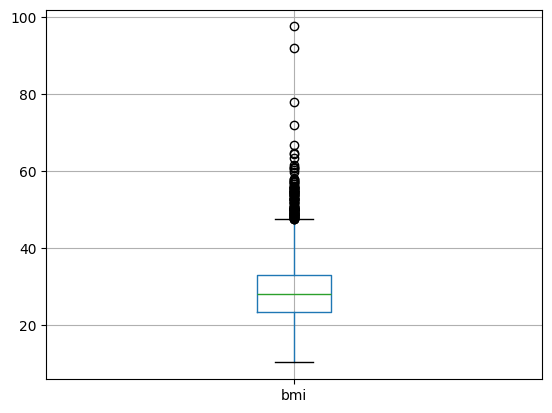

In [32]:
df.boxplot(column="bmi")
plt.show()

In [33]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean()) # On remplace les valeurs vides par la valeur minimales

In [34]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

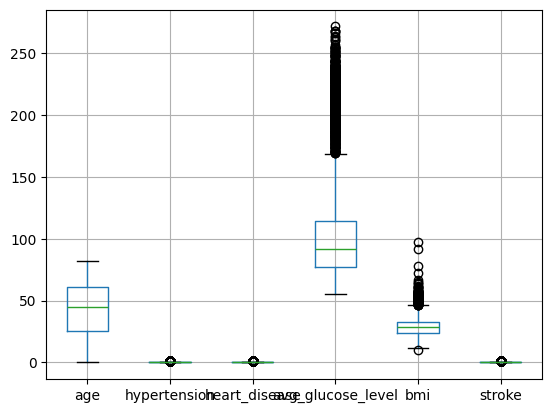

In [35]:
df.boxplot()
plt.show()

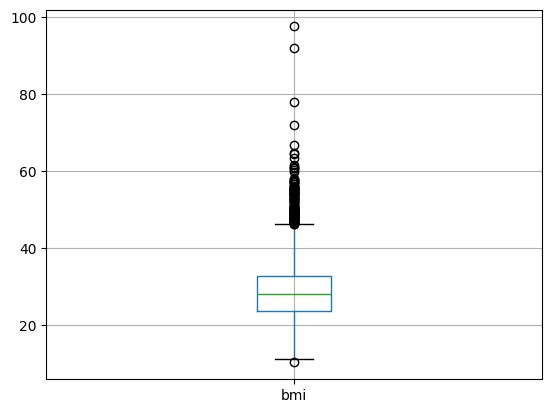

In [50]:
df1 = pd.read_csv("stroke_data.csv", sep = ";")
df1 = df1.drop(columns="id", axis=1)
df1.bmi = df1.bmi.fillna(df1.bmi.quantile(0.5))  # On crée une nouvelle dataset ou les valeurs manquantes du bmi sont remplacées par le quantile au lieu de la médiane
df1.boxplot(column="bmi")
plt.show()

In [52]:
pd.crosstab(df1.stroke,"freq")#calculer la frequence pour chaque valeur de stoke dans un tableau croisé

col_0,freq
stroke,
0,4861
1,249
